## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*For this project, predictive modeling approach seems best for predicting the quality of red wine using its physicochemical properties. This can be achieved using <b>machine learning</b> as it would help in determining which properties would best predict the wine quality.*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*The physicochemical data retrieved from laboratories would suit best for red wine quality prediction because the combination of these properties determine the taste and hence the quality of wine.*

### Data Collection

**Q3. From where do we get our data?**

*The data for red wine quality is gathered from 2 main sources:*
*   *<b>Human evaluation</b>: The wine testers can, who are experts in the taste of wine rate the wine which can provide the quality aspect of the data*
*   *<b>Chemical analysis</b>: The chemical analysis of the wine can provide the physicochemical data.*

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*The red wine samples are obtained from red portugal wine samples (vinho verde)*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*After applying the ML techniques we will know which of varibles are affecting the quality of the wine the most. If the business knows the amount of such variables, they can understand the quality of the wine and hence would reduce the cost hiring wine testers.*


<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

### Data Preparation

#### Explore the dataset further
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

### Modeling
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

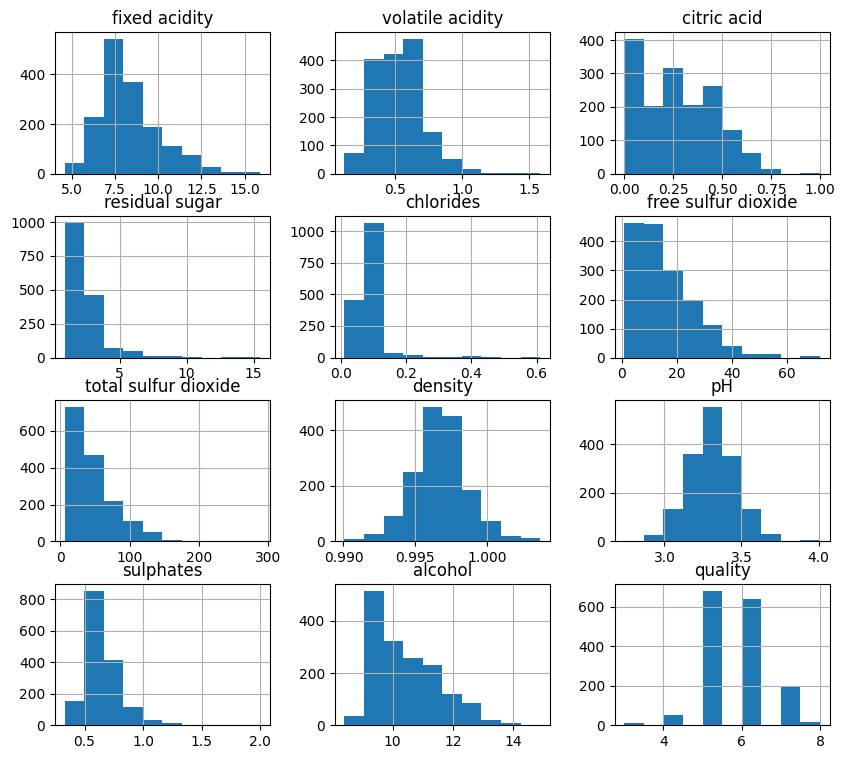

In [5]:
wine.hist(figsize=(10,9))

In [27]:
#Checking outliers using Box plot

fig = px.box(wine, y= wine.columns, title='Box plot of wine quality attributes', labels={'value': 'Value', 'variable': 'Attributes'})
fig.show(), wine.shape

(None, (1599, 12))

In [32]:
#Removing Outliers using IQR meathod
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return a DataFrame without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in wine.columns:
    wine = remove_outliers_iqr(wine, col)

fig = px.box(wine, y= wine.columns, title='Box plot of wine quality attributes', labels={'value': 'Value', 'variable': 'Attributes'})
fig.show(), wine.shape

(None, (928, 12))

<Axes: >

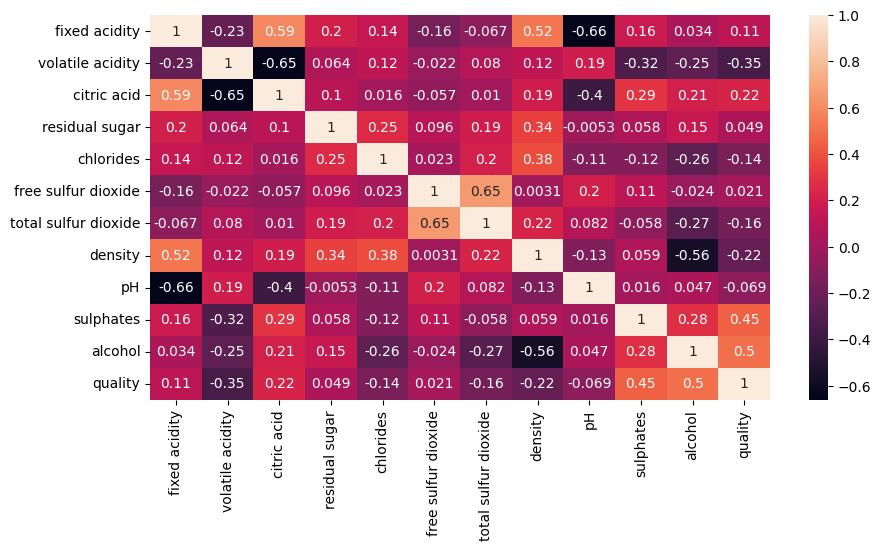

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(data = wine.corr(), annot=True)

In [34]:
X = wine.drop(columns=['quality'])
y = wine['quality']
X, y.shape

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1592            6.3             0.510         0.13             2.3      0.076   
 1593            6.8             0.620         0.08             1.9      0.068   
 1594            6.2             0.600         0.08             2.0      0.090   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 
       free su

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

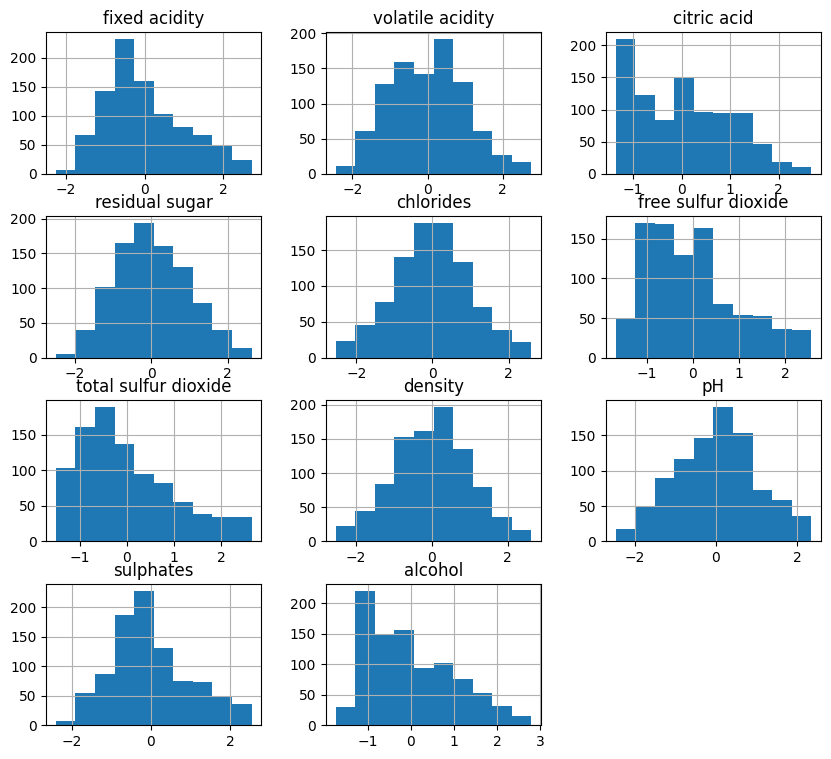

In [35]:
X_columns = X.columns
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns= X_columns)

X_scaled.hist(figsize=(10,9))

In [36]:
#Feature selection using pearson algorithm for Linear Regression

fs = SelectKBest(score_func=f_regression, k=5)
X_selected = (fs.fit_transform(X_scaled, y))
mask = fs.get_support()
selected_columns = X.columns[mask]
X_selected = pd.DataFrame(data=X_selected, columns= selected_columns)
X_selected

,volatile acidity,citric acid,density,sulphates,alcohol
0,1.071155,-1.363754,0.950092,-0.591866,-0.998662
1,2.162764,-1.363754,0.253872,0.549041,-0.576721
2,1.435025,-1.126424,0.393116,0.263814,-0.576721
3,-1.475934,1.958870,1.089335,-0.401715,-0.576721
4,1.071155,-1.363754,0.950092,-0.591866,-0.998662
...,...,...,...,...,...
923,-0.081100,-0.592431,-0.484120,1.214571,0.689102
924,0.585995,-0.889094,0.051969,1.880100,-0.893177
925,0.464705,-0.889094,-1.068944,-0.401715,0.161676
926,-0.081100,-0.592431,-0.484120,1.214571,0.689102


In [37]:
#Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

model_IS = pd.Series((model.coef_), index=X_selected.columns)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 0.4717
Root Mean Squared Error: 0.5777
R-squared: 0.3035


In [38]:
#Ridge Regression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model2 = Ridge()
param = {'alpha' : np.logspace(-3, 3, 3)}
model_cv = GridSearchCV(model2, param, cv=5, scoring='neg_mean_squared_error')
model_cv.fit(X_train, y_train)

best_alpha = model_cv.best_params_['alpha']

ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

ridge_best_coef = ridge_best.coef_
feature_imp = (ridge_best_coef)

importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': feature_imp
}).sort_values(by='Importance', ascending=False)

y_pred2 = ridge_best.predict(X_test)
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)
print(f"Mean Absolute Error: {mae2:.4f}")
print(f"Root Mean Squared Error: {rmse2:.4f}")
print(f"R-squared: {r2_2:.4f}")

Mean Absolute Error: 0.4721
Root Mean Squared Error: 0.5789
R-squared: 0.3008


In [39]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'R² Score': [r2, r2_2],
    'RMSE': [rmse, rmse2],
    'MAE': [mae, mae2]
})

print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
               Model  R² Score      RMSE       MAE
0  Linear Regression   0.30350  0.577750  0.471734
1   Ridge Regression   0.30078  0.578877  0.472138


* R² Score: <b>Linear Regression</b> has a slightly higher R² score than <b>Ridge Regression</b>, indicating that it explains a marginally higher proportion of the variance in wine quality.

* RMSE: <b>Linear Regression</b> has a lower RMSE, suggesting that its predictions are closer to the actual values.

* MAE: Similarly, <b>Linear Regression</b> exhibits a lower MAE, reinforcing that its predictions are more accurate on average.

In [40]:
#Linear Regression Feature importance table
df = (model_IS.sort_values(ascending=False)).reset_index()
df.columns = ['Feature', 'Importance']
df = df.reindex(np.abs(df['Importance']).sort_values(ascending=False).index)
print(df)

            Feature  Importance
0           alcohol    0.287862
1         sulphates    0.217392
4  volatile acidity   -0.145279
3       citric acid   -0.044457
2           density    0.017627


In [41]:
#Ridge Regression Feature importance table
importance= importance.reindex(np.abs(importance['Importance']).sort_values(ascending=False).index)
print(importance)

                 Feature  Importance
10               alcohol    0.312335
9              sulphates    0.215300
1       volatile acidity   -0.147804
8                     pH   -0.088498
2            citric acid   -0.067793
7                density    0.065314
0          fixed acidity   -0.042540
4              chlorides   -0.030606
6   total sulfur dioxide   -0.028434
5    free sulfur dioxide    0.017146
3         residual sugar   -0.001688


In [42]:
#Graph comparison of both regression models
fig = px.bar(df, x='Feature', y='Importance', title='Linear Regression model\'s feature importance chart', labels={'Feature': 'Features', 'Importance': 'Importances'})
fig.show()
fig = px.bar(importance, x='Feature', y='Importance', title='Ridge Regression model\'s feature importance chart', labels={'Feature': 'Features', 'Importance': 'Importances'})
fig.show()

### Conclusion

The top 3 prominent features that both Linear Regression model and Ridge Regression model displayed were alcohol, volatile acidity, and sulphates. Checking thes values would let a businees know the quality of the wine. The following are the proportionality of these features
* Alcohol: If the alcohol is <b>more</b> the wine is <b>good</b>.
* Volatile Acidity: The wine is <b>good</b> if the volatile acidity is <b>less</b>.
* Sulphates: <b>More</b> the sulphates <b>better</b> the wine 